## Classification

This type of classification problem where there are only two possible outputs is called binary classification. Where the word binary refers to there being only two possible classes or two possible categories. <br>
Negative or positive dont refer to 'bad' vs 'good'. They just present true false or 0,1. <br>
In first video its explained why we cant use linear regression models for classification.<br>
![Regression](Regression.png)
Now if we dont have extreme point wala example then blue regression line will be made. The blue vertical line is decision boundary. How is it made ? Suppose we set threshold value of 0.5 and everything above 0.5 means 1 and below 0.5 means 0. The threshold value corresponds to a point on regression line and os point par we vertical line that is decision boundary. So far decision boundary gives us right results. Everything on left of it is zero and right is 1. <br>
Now, we have new extreme point and hence regression line and decision boundary is shifted. Now according to what we did earliar that is right par 0 then our results come out to be wrong. and hence misclassification happens.

### Why cant we apply linear regression for Classification ?

In [52]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import dlc, plot_data
from plt_one_addpt_onclick import plt_one_addpt_onclick
plt.style.use('./deeplearning.mplstyle')

In [54]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

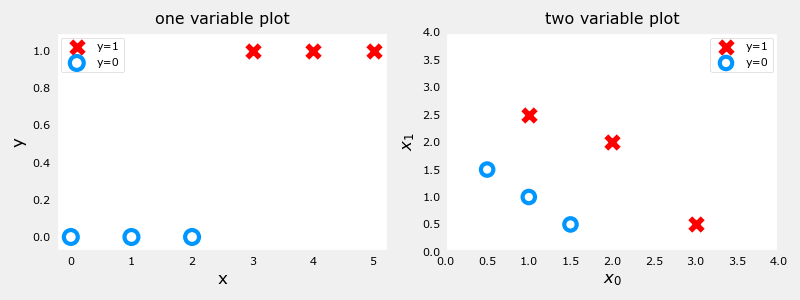

In [56]:
pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
# s is each scatter point size
#edgecolor marker's border color
#lw is line width for hollow circle
#facecolor is color inside marker
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)
ax[0].set_ylim(-0.08,1.1) #range of y axis -.0.08 is minimum and 1.1 is maximum
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

#plot 2, two variables
plot_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4]) #sets axis limits 
# x axis from 0 to 4 and y axis from 0 to 4
ax[1].set_ylabel('$x_1$', fontsize=12) #due to dollar sign, 1 will go in subscript of x
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()

In the two-variable plot, the y axis is not available. Positive results are shown as red 'X's, while negative results use the blue 'O' symbol.

## Linear Rregression Approach

The model will predict if a tumor is benign or malignant based on tumor size. <br>
- Click on 'Run Linear Regression' to find the best linear regression model for the given data. Note the resulting linear model does not match the data well. One option to improve the results is to apply a threshold.
- Tick the box on the 'Toggle 0.5 threshold' to show the predictions if a threshold is applied. These predictions look good, the predictions match the data.
- Important: Now, add further 'malignant' data points on the far right, in the large tumor size range (near 10), and re-run linear regression.
- Now, the model predicts the larger tumor, but data point at x=3 is being incorrectly predicted!
- to clear/renew the plot, rerun the cell containing the plot command.

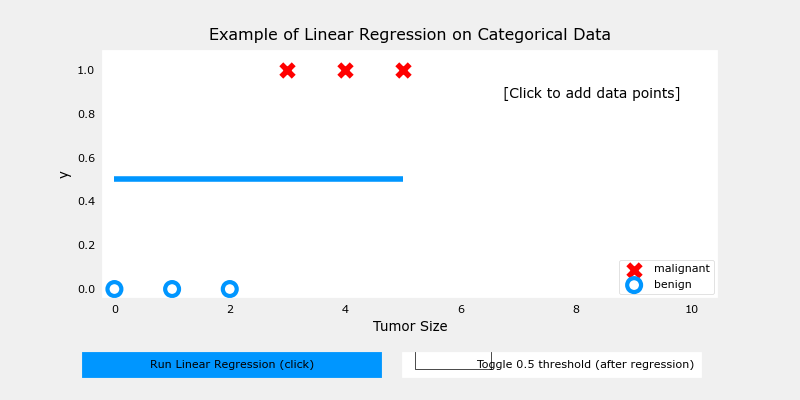

In [60]:
w_in = np.zeros((1)) #1D array created containg zeros
#shape will be (1,)
b_in = 0
plt.close('all') 
addpt = plt_one_addpt_onclick( x_train,y_train, w_in, b_in, logistic=False) 
#logistic false means logistic regression is not applied

The example above demonstrates that the linear model is insufficient to model categorical data. The model can be extended as described in the following lab.

## Logistic Regression

![Logistic Regression](Logistic.png) <br>
What logistic regression we end up doing is fit a curve that looks like this, S-shaped curve to this dataset. For this example, if a patient comes in with a tumor of this size, which I'm showing on the x-axis, then the algorithm will output 0.7 suggesting that is closer or maybe more likely to be malignant and benign. <br>
Sigmoid function <br>
![Sigmoid function](Sigmoid.png) <br>
Output values between 0 to 1. The function is denoted by the following formula.<br>
g(z) = 1/(1+e^(-z)) <br>
When z is large then function results output 1 and that can be seen from the formula.<br>
Linear regression model z = w.x + b then we pass the value of z into the g(z) function. The output will be between 0 to 1. Hence when we put these 2 together , we get model of logistic regression model of f(x).<br>
f(x) = g(w.x + b) <br>
The way I encourage you to think of logistic regressions output is to think of it as outputting the probability that the class or the label y will be equal to 1 given a certain input x. For example, in this application, where x is the tumor size and y is either 0 or 1, if you have a patient come in and she has a tumor of a certain size x, and if based on this input x, the model I'll plus 0.7, then what that means is that the model is predicting or the model thinks there's a 70 percent chance that the true label y would be equal to 1 for this patient.<br>

## Logistic Regression Implementation using Sigmoid function

In [25]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from plt_one_addpt_onclick import plt_one_addpt_onclick
from lab_utils_common import draw_vthresh
plt.style.use('./deeplearning.mplstyle')
%matplotlib inline

### Sigmoid or Logistic Function

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model.

- In the case of a single example, z is scalar.
- In the case of multiple examples, z may be a vector consisting of m values, one for each example.
- The implementation of the sigmoid function should cover both of these potential input formats. Let's implement this in Python.

In [29]:
#input is an array
input_array = np.array([1,2,3])
exp_array = np.exp(input_array)

print("Input to exp:", input_array)
print("Output of exp:", exp_array)

# Input is a single number
input_val = 1  
exp_val = np.exp(input_val)

print("Input to exp:", input_val)
print("Output of exp:", exp_val)

Input to exp: [1 2 3]
Output of exp: [ 2.72  7.39 20.09]
Input to exp: 1
Output of exp: 2.718281828459045


In [31]:
def sigmoid(z):
    '''
    Compute the sigmoid of z

    Args:
        z(ndarray): A scalar, numpy array of any size
    Returns:
        g(ndarray) : sigmoid(z), with the same shape as z
    '''

    g = 1/(1+np.exp(-z))
    return g

In [33]:
z_tmp  = np.arange(-10,11)

y = sigmoid(z_tmp)

np.set_printoptions(precision=2)
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])
#np.c_[] creates an array where it concatenates z_tmp and y column wise 

Input (z), Output (sigmoid(z))
[[-1.00e+01  4.54e-05]
 [-9.00e+00  1.23e-04]
 [-8.00e+00  3.35e-04]
 [-7.00e+00  9.11e-04]
 [-6.00e+00  2.47e-03]
 [-5.00e+00  6.69e-03]
 [-4.00e+00  1.80e-02]
 [-3.00e+00  4.74e-02]
 [-2.00e+00  1.19e-01]
 [-1.00e+00  2.69e-01]
 [ 0.00e+00  5.00e-01]
 [ 1.00e+00  7.31e-01]
 [ 2.00e+00  8.81e-01]
 [ 3.00e+00  9.53e-01]
 [ 4.00e+00  9.82e-01]
 [ 5.00e+00  9.93e-01]
 [ 6.00e+00  9.98e-01]
 [ 7.00e+00  9.99e-01]
 [ 8.00e+00  1.00e+00]
 [ 9.00e+00  1.00e+00]
 [ 1.00e+01  1.00e+00]]


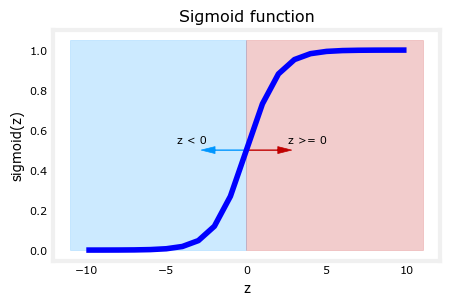

In [39]:
#the above output are between 0 to 1
#lets visualize them now
fig, ax=plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp,y,c='b')

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0) #its a custom function

As u can see, the sigmoid function approaches 0 as z goes to large negative values and approaches 1 as z goes to large positive values

### Logistic Regression

In [43]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

w_in = np.zeros((1))
b_in = 0

Try doing the following steps
- Click on 'Run Logistic Regression' to find the best logistic regression model for the given training data.
- Note the resulting model fits the data quite well.
- Note, the orange line is z or w.x + b above. It does not match the line in a linear regression model. Further improve these results by applying a threshold. (The orange line is basically decision boundary where the linear regression line becomes 0).
- Tick the box on the 'Toggle 0.5 threshold' to show the predictions if a threshold is applied
- These predictions look good. The predictions match the data
- Now, add further data points in the large tumor size range (near 10), and re-run logistic regression.
- unlike the linear regression model, this model continues to make correct predictions

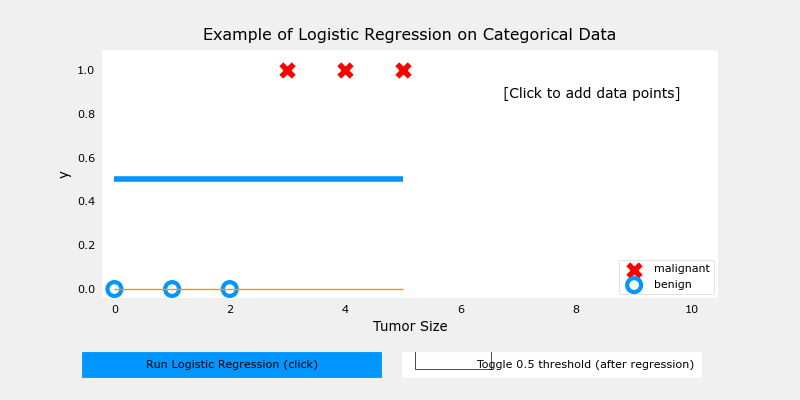

In [65]:
plt.close('all') 
addpt = plt_one_addpt_onclick( x_train,y_train, w_in, b_in, logistic=True)

## Decision Boundary

Now, what if you want to learn the algorithm to predict. Is the value of y going to be zero or one? Well, one thing you might do is set a threshold above which you predict y is one, or you set y hat prediction to be equal to one and below which you might say y hat prediction is going to be equal to zero. A common choice would be to pick a threshold of 0.5 so that if f(x) is greater than or equal to 0.5, then predict y is one. <br>
Hence, u see now when is f(x) greater than 0.5 ?<br>
That is when g(z) is greater than 0.5. <br>
That is when z is greater to or equal to 0. <br>
z is 0 or greater than it when w.x + b is equal to 0 or greater than it. <br>

Now Lets take classification problem where we have 2 features.<br>
We have to figure out when is z = w.x + b greater than 0 and when is it less than 0. <br>
To figure that out, there's a very interesting line to look at, which is when wx + b is exactly equal to 0. It turns out that this line is also called the decision boundary because that's the line where you're just almost neutral about whether y is 0 or y is 1.<br>
![Decision Boundary](Decision.png) <br>
now suppose w1=w2=1 and b=-3 in these example here. Hence for decision boundary z = w.x + b we will find a line i.e x1 + x2 = 3 here and when we draw this line then this line is decision boundary. Of course, if you had a different choice of the parameters, the decision boundary would be a different line. 

COMPLEX EXAMPLES WHERE DECISION BOUNDARY IS NO LONGER STRAIGHT LINE
